Importing the Dependencies

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
car_dataset = pd.read_csv('/content/Cars_data.csv')

In [4]:
car_dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# Numbers of row ans coloms
car_dataset.shape

(11914, 16)

In [8]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
# checkout missing values
car_dataset.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [18]:
car_dataset_cleaned = car_dataset.dropna()
car_dataset_cleaned = car_dataset.dropna(axis=1)


In [29]:
print(car_dataset['Transmission Type'].value_counts())
print(car_dataset['Engine Fuel Type'].value_counts())

Transmission Type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64
Engine Fuel Type
regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64


Encoding

In [31]:
# encoding Transmission Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [33]:
car_dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Spliting Data

In [35]:
X = car_dataset.drop(['Make','MSRP'],axis=1)
Y = car_dataset['MSRP']

In [37]:
print(X)

            Model  Year                Engine Fuel Type  Engine HP  \
0      1 Series M  2011     premium unleaded (required)      335.0   
1        1 Series  2011     premium unleaded (required)      300.0   
2        1 Series  2011     premium unleaded (required)      300.0   
3        1 Series  2011     premium unleaded (required)      230.0   
4        1 Series  2011     premium unleaded (required)      230.0   
...           ...   ...                             ...        ...   
11909         ZDX  2012     premium unleaded (required)      300.0   
11910         ZDX  2012     premium unleaded (required)      300.0   
11911         ZDX  2012     premium unleaded (required)      300.0   
11912         ZDX  2013  premium unleaded (recommended)      300.0   
11913      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0 

In [45]:
print(Y)

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11914, dtype: int64


Data Visulisation

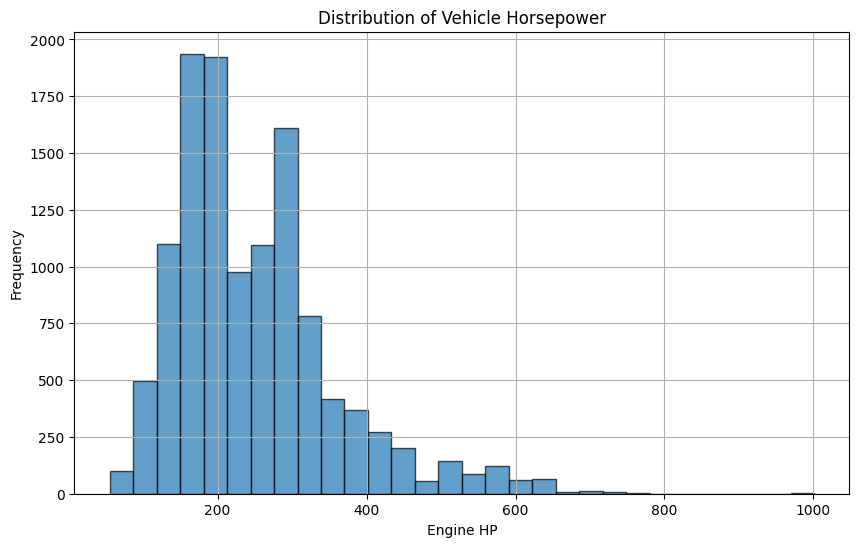

In [55]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(car_dataset['Engine HP'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Vehicle Horsepower')
plt.xlabel('Engine HP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-83-541623837ef1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle Size', y='MSRP', data=car_dataset, palette='Set2')


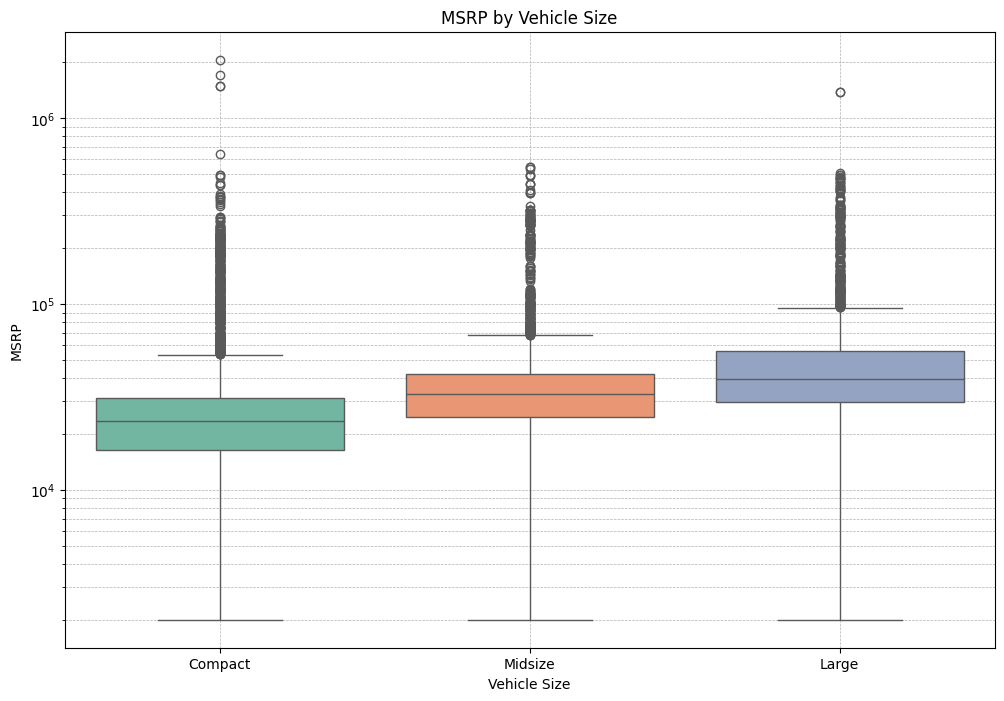

In [83]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Vehicle Size', y='MSRP', data=car_dataset, palette='Set2')
plt.title('MSRP by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('MSRP')
plt.yscale('log')  # Log scale to handle wide range of MSRP values
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

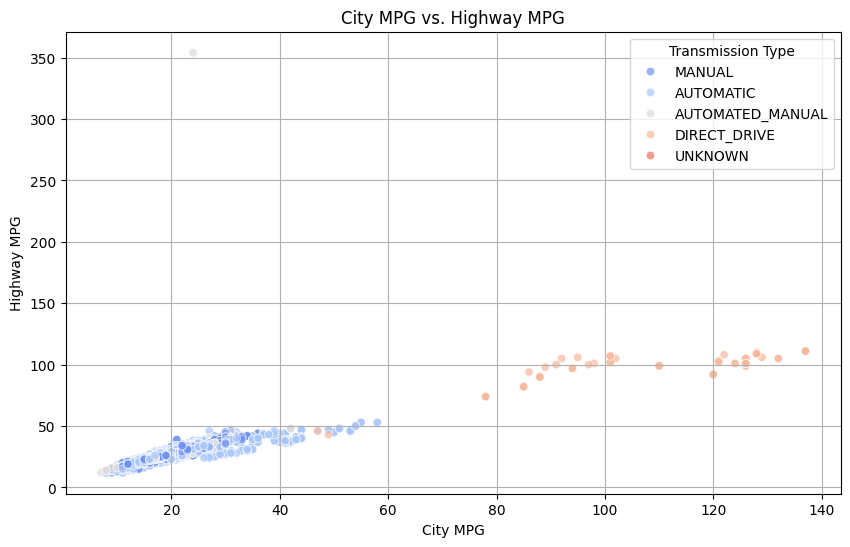

In [85]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city mpg', y='highway MPG', hue='Transmission Type', data=car_dataset, palette='coolwarm', alpha=0.7)
plt.title('City MPG vs. Highway MPG')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.grid(True)
plt.legend(title='Transmission Type')
plt.show()